# LGM Virtual Internship Program

## Beginner Level Task 3 : Music Recommendation

## Beginner Level Project

## Dataset : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

# Name : Amaan Ali

# ----------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
df.shape

(46827, 6)

In [ ]:
df = df.sample(frac=0.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4683 entries, 21973 to 9365
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                4683 non-null   object 
 1   song_id             4683 non-null   object 
 2   source_system_tab   4669 non-null   object 
 3   source_screen_name  4518 non-null   object 
 4   source_type         4672 non-null   object 
 5   target              4683 non-null   float64
dtypes: float64(1), object(5)
memory usage: 256.1+ KB


In [ ]:
songs = pd.read_csv('songs.csv')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [ ]:
members = pd.read_csv('songs.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4683 entries, 0 to 4682
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                4683 non-null   object 
 1   song_id             4683 non-null   object 
 2   source_system_tab   4669 non-null   object 
 3   source_screen_name  4518 non-null   object 
 4   source_type         4672 non-null   object 
 5   target              4683 non-null   float64
 6   song_length         4682 non-null   float64
 7   genre_ids           4610 non-null   object 
 8   artist_name         4682 non-null   object 
 9   composer            3702 non-null   object 
 10  lyricist            2784 non-null   object 
 11  language            4682 non-null   float64
dtypes: float64(3), object(9)
memory usage: 475.6+ KB


In [ ]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4683 entries, 0 to 4682
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                4683 non-null   object 
 1   song_id             4683 non-null   object 
 2   source_system_tab   4683 non-null   object 
 3   source_screen_name  4683 non-null   object 
 4   source_type         4683 non-null   object 
 5   target              4683 non-null   float64
 6   song_length         4683 non-null   float64
 7   genre_ids           4683 non-null   object 
 8   artist_name         4683 non-null   object 
 9   composer            4683 non-null   object 
 10  lyricist            4683 non-null   object 
 11  language            4683 non-null   float64
dtypes: float64(3), object(9)
memory usage: 475.6+ KB


In [ ]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [ ]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
msno,1.000000,-0.012635,-0.013913,0.028375,-0.022454,0.011692,-0.006600,-0.005900,0.024369,-0.011871,-0.022065,-0.022931
song_id,-0.012635,1.000000,0.019697,-0.006192,0.035108,-0.006652,-0.018041,0.055005,-0.021164,-0.004240,-0.029332,-0.003638
source_system_tab,-0.013913,0.019697,1.000000,-0.040067,-0.108143,0.056447,0.012626,0.032322,-0.006870,0.025326,0.017728,-0.037537
source_screen_name,0.028375,-0.006192,-0.040067,1.000000,0.265228,-0.094730,-0.024543,0.000165,-0.024211,-0.002634,-0.016710,0.011411
source_type,-0.022454,0.035108,-0.108143,0.265228,1.000000,-0.156079,-0.009285,0.000222,-0.003358,0.001700,0.004392,-0.000760
target,0.011692,-0.006652,0.056447,-0.094730,-0.156079,1.000000,0.005909,-0.011650,0.000180,0.007291,0.005741,-0.009530
song_length,-0.006600,-0.018041,0.012626,-0.024543,-0.009285,0.005909,1.000000,0.039033,0.192461,0.135701,0.120856,-0.283280
genre_ids,-0.005900,0.055005,0.032322,0.000165,0.000222,-0.011650,0.039033,1.000000,0.172590,0.183099,0.152690,-0.324041
artist_name,0.024369,-0.021164,-0.006870,-0.024211,-0.003358,0.000180,0.192461,0.172590,1.000000,0.358185,0.314538,-0.603229
composer,-0.011871,-0.004240,0.025326,-0.002634,0.001700,0.007291,0.135701,0.183099,0.358185,1.000000,0.700273,-0.409503


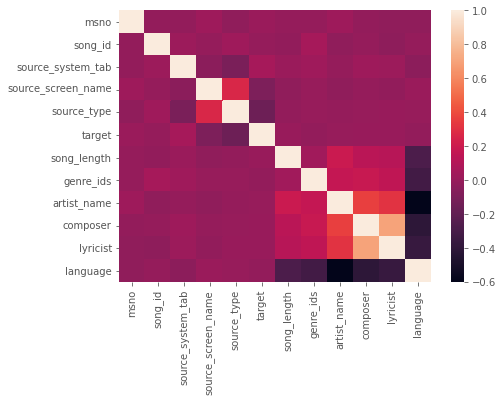

In [ ]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

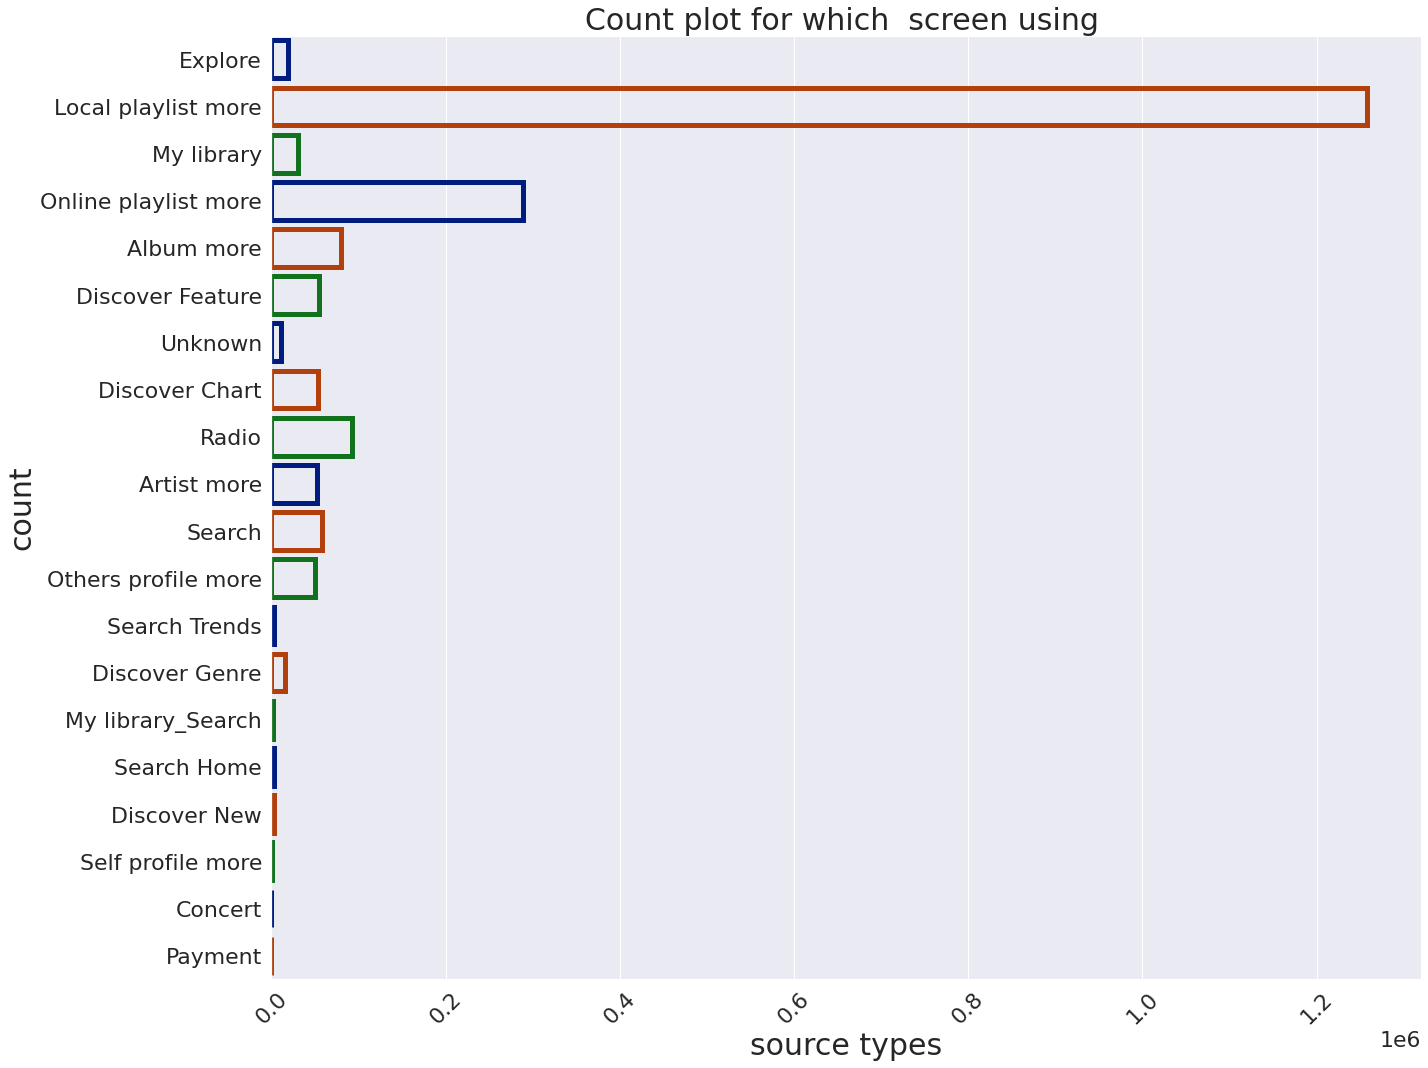

In [ ]:
tra = pd.read_csv('train.csv')
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=tra,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()


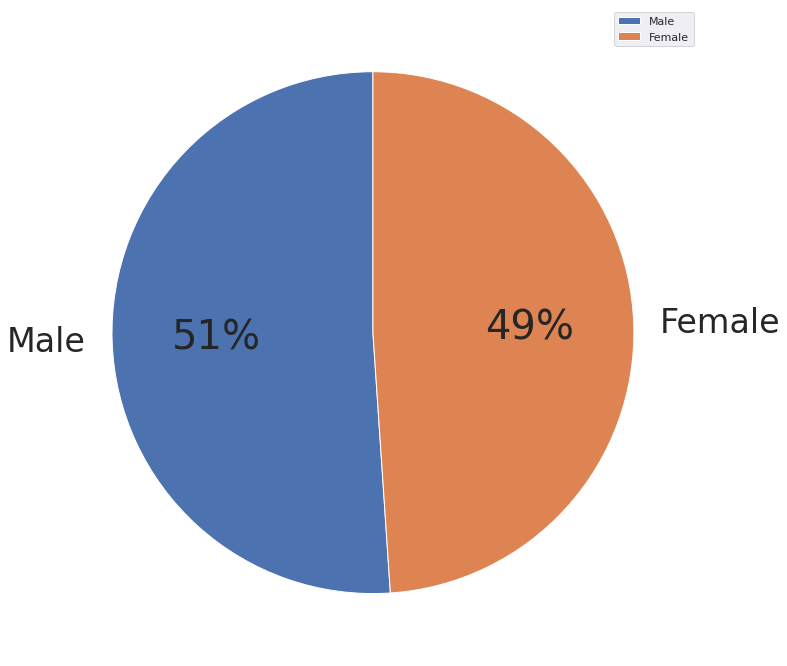

In [ ]:
import matplotlib as mpl
members = pd.read_csv('members.csv')

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [ ]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

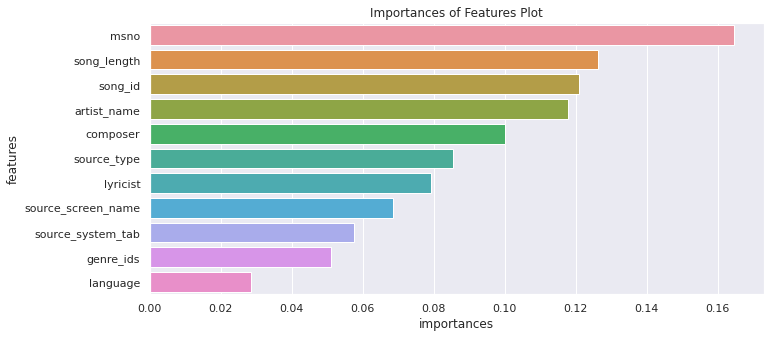

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
model.feature_importances_

array([0.16475014, 0.12085694, 0.05744784, 0.06866648, 0.0853099 ,
       0.12619182, 0.05106637, 0.11784371, 0.0999904 , 0.07931083,
       0.02856556])

In [ ]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [ ]:
target = df.pop('target')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

         0.0       0.55      0.35      0.42       365
         1.0       0.80      0.90      0.85      1040

    accuracy                           0.76      1405
   macro avg       0.67      0.62      0.64      1405
weighted avg       0.73      0.76      0.74      1405

